In [2]:
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
import json
import copy

# Main qiskit imports
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer, IBMQ

# Error mitigation
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, 
                                                CompleteMeasFitter, 
                                                MeasurementFilter)

# Utility functions
from qiskit.tools.jupyter import *
from qiskit.tools.monitor import job_monitor
from qiskit.providers.jobstatus import JobStatus

In [15]:
# We create the quantum circuits
q = QuantumRegister(5, name='q')

## Index of the system qubit
system = [2, 1]

p = 0.3
## Indices of the ancillary qubits
ancilla = 0

## zz pump  
zz = QuantumCircuit(q)
    
theta = 2 * np.arcsin(np.sqrt(p))
    
# Map information to ancilla
zz.cx(q[system[0]], q[system[1]])
zz.x(q[ancilla])
zz.cx(q[system][1], q[ancilla])
    
# Conditional rotation
zz.cu3(theta, 0.0, 0.0, q[ancilla], q[system[1]])
    
# Inverse mapping
zz.cx(q[system[1]], q[ancilla])
zz.cx(q[system[0]], q[system[1]])

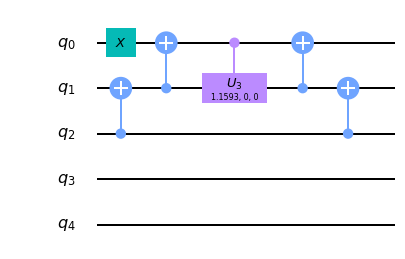

In [16]:
zz.draw(output='mpl')

In [8]:
# We create the quantum circuits
q = QuantumRegister(5, name='q')

## Index of the system qubit
system = [2, 1]

p = 0.3
## Indices of the ancillary qubits
ancilla = 4

## xx pump
xx = QuantumCircuit(q)

theta = 2 * np.arcsin(np.sqrt(p))
    
# Map information to ancilla
xx.cx(q[system[0]], q[system[1]])
xx.h(q[system[0]])
xx.x(q[ancilla])
xx.cx(q[system[0]], q[ancilla])
    
# Conditional rotation
xx.cu3(theta, 0.0, 0.0, q[ancilla], q[system[0]])
    
# Inverse mapping
xx.cx(q[system[0]], q[ancilla])
xx.h(q[system[0]])
xx.cx(q[system[0]], q[system[1]])

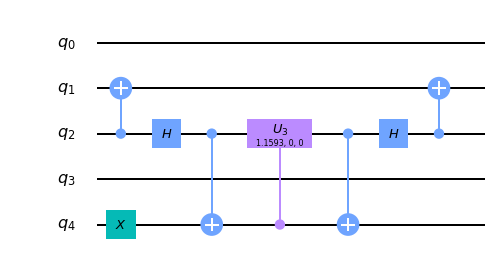

In [9]:
xx.draw(output = 'mpl')

In [10]:
# We create the quantum circuits
q = QuantumRegister(5, name='q')

## Index of the system qubit
system = [2, 1]

p = 0.3
## Indices of the ancillary qubits
ancillae = 0,4

zx = QuantumCircuit(q)
    
theta = 2 * np.arcsin(np.sqrt(p))
    
# ZZ pump
## Map information to ancilla
zx.cx(q[system[0]], q[system[1]])
zx.x(q[ancillae[0]])
zx.cx(q[system[1]], q[ancillae[0]])
    
## Conditional rotation
zx.cu3(theta, 0.0, 0.0, q[ancillae[0]], q[system[1]])
    
## Inverse mapping
zx.cx(q[system[1]], q[ancillae[0]])
    
# XX pump
## Map information to ancilla
zx.h(q[system[0]])
zx.x(q[ancillae[1]])
zx.cx(q[system[0]], q[ancillae[1]])
    
## Conditional rotation
zx.cu3(theta, 0.0, 0.0, q[ancillae[1]], q[system[0]])
    
## Inverse mapping
zx.cx(q[system[0]], q[ancillae[1]])
zx.h(q[system[0]])
zx.cx(q[system[0]], q[system[1]])

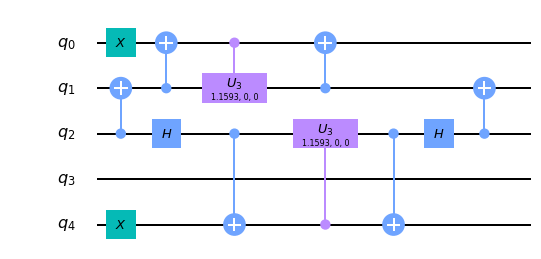

In [11]:
zx.draw(output = 'mpl')

In [12]:
## 2.1.

## We create the quantum circuits
q = QuantumRegister(2, name='q')

## We create qubits
system = [0, 1]

bell = QuantumCircuit(q)

# Creating a Bell state
bell.x(q[system[0]])
bell.x(q[system[1]])
bell.h(q[system[0]])
bell.cx(q[system[0]], q[system[1]])

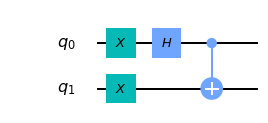

In [13]:
bell.draw(output = 'mpl')

In [18]:
## Exercise 2.1.1.

## We create the quantum circuits
q = QuantumRegister(2, name='q')

## We create qubits
system = [0, 1]

entangled = QuantumCircuit(q)

# Creating an entangled state
entangled.h(q[system[0]])
entangled.s(q[system[0]])
entangled.cx(q[system[0]], q[system[1]])
entangled.h(q[system[0]])

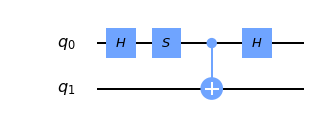

In [19]:
entangled.draw(output = 'mpl')

In [20]:
## 2.2.

## We create the quantum circuits
q = QuantumRegister(2, name='q')

## We create qubits
system = [0, 1]

cir = QuantumCircuit(q)

# Creating CNOT gate
cir.cx(q[system[0]], q[system[1]])

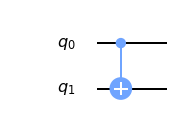

In [21]:
cir.draw(output = 'mpl')

In [24]:
## Exercise 2.2.1.

## We create the quantum circuits
q = QuantumRegister(2, name='q')

## We create qubits
system = [0, 1]

cir = QuantumCircuit(q)

# Creating an entangled state
cir.h(q[system[1]])
cir.cz(q[system[0]], q[system[1]])
cir.cx(q[system[1]], q[system[0]])

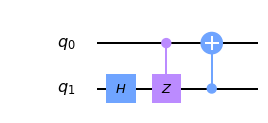

In [25]:
cir.draw(output = 'mpl')

In [16]:
# We create the quantum circuits
q = QuantumRegister(5, name='q')

## Indices of the system and environment qubits
sys = 1
env = 2

ad = QuantumCircuit(q)
    
# Rotation angle
theta = 3.14
    
# Channel
ad.x(q[sys])
ad.cu3(theta, 0.0, 0.0, q[sys], q[env])
ad.cx(q[env], q[sys])

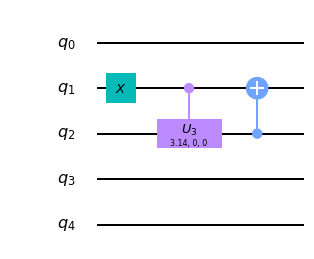

In [17]:
ad.draw(output = 'mpl')

In [20]:
q = QuantumRegister(5, name="q")
c = ClassicalRegister(2, name="c")

## Indices of the system, environment and ancillary qubits
sys = 1
env = 2
anc = 3

ad = QuantumCircuit(q, c)
    
# Rotation angle
theta = 3.14
    
# Channel
ad.cu3(theta, 0.0, 0.0, q[sys], q[env])
ad.cx(q[env], q[sys])
    
# Masurement of the corresponding observable
if observable == 'xx':
    ad.h(sys)
    ad.h(anc)
elif observable == 'yy':
    ad.sdg(sys)
    ad.h(sys)
    ad.sdg(anc)
    ad.h(anc)
ad.measure(sys,c[0])
ad.measure(anc,c[1])

NameError: name 'observable' is not defined